In [1]:
!pip install pyreadstat

In [3]:
# Import the numpy and pandas package, pyreadstat
import numpy as np
import pandas as pd
import pyreadstat
# Read the given sav file, and view some sample records
ibtissem_maoui, meta = pyreadstat.read_sav('C:/Users/Client/Downloads/Tp_mr.khmayes/Tps/Tps/test_scores.sav')
ibtissem_maoui

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,1.0,1.0,ZBH,0.0,30.0,T8LSK,1.0,2.0,39.0,55.0
2129,ZOWMK,1.0,1.0,ZBH,0.0,30.0,VNP26,1.0,1.0,38.0,46.0
2130,ZOWMK,1.0,1.0,ZBH,0.0,30.0,YDR1Z,1.0,1.0,45.0,51.0
2131,ZOWMK,1.0,1.0,ZBH,0.0,30.0,YUEIH,0.0,1.0,46.0,53.0


In [4]:
# Shape of our dataset
ibtissem_maoui.shape

# Info our dataset
ibtissem_maoui.info()

# Describe our dataset
ibtissem_maoui.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


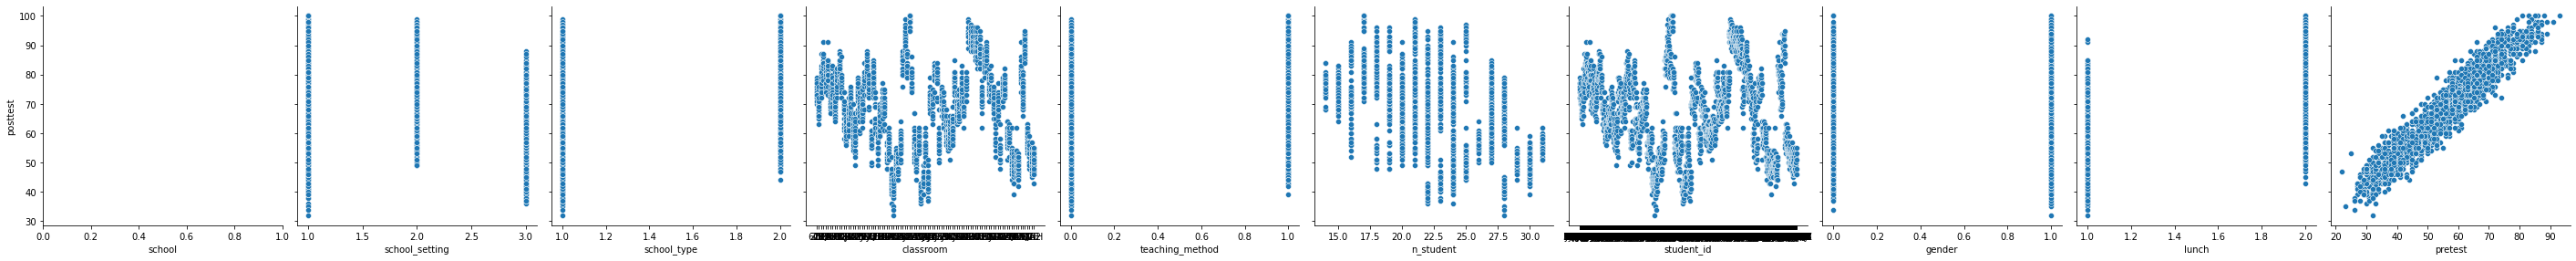

In [7]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(ibtissem_maoui, x_vars=['school','school_setting','school_type','classroom','teaching_method','n_student','student_id','gender', 'lunch','pretest'], 
             y_vars='posttest', height=4, aspect=1, kind='scatter')
plt.show()

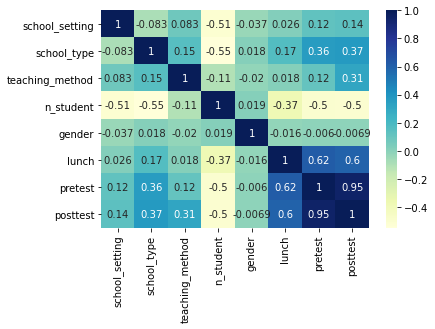

In [8]:
# Visualizing the data using heatmap
sns.heatmap(ibtissem_maoui.corr(), cmap="YlGnBu", annot = True)
plt.show()

Text(0, 0.5, 'posttest')

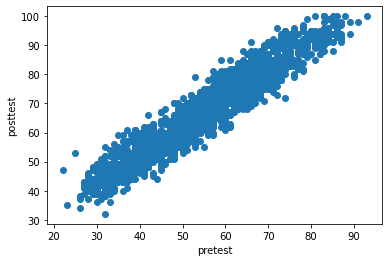

In [9]:
# Creating X and y
X = ibtissem_maoui['pretest']
y = ibtissem_maoui['posttest']
plt.scatter(X,y)
plt.xlabel("pretest")
plt.ylabel("posttest")

In [11]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [12]:
# Take a look at the train dataset
X_train
y_train

1455    81.0
299     67.0
1912    49.0
863     92.0
298     64.0
        ... 
350     57.0
1930    53.0
79      79.0
1859    47.0
1544    89.0
Name: posttest, Length: 1493, dtype: float64

In [13]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [14]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const      13.374988
pretest     0.978308
dtype: float64

In [15]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.429e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:57:10   Log-Likelihood:                -4291.4
No. Observations:                1493   AIC:                             8587.
Df Residuals:                    1491   BIC:                             8597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3750      0.465     28.776      0.000      12.463      14.287
pretest        0.9783      0.008    119.525      0.000       0.962       0.994
==============================================================================
Omnibus:                       20.611   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.131
Skew:                           0.167   Prob(JB):                     0.000314
Kurtosis:                       2.616   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

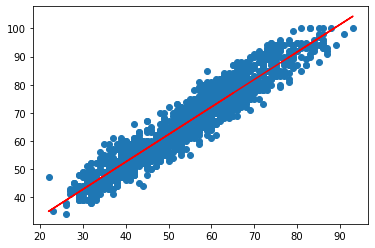

In [16]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 13.3750 + 0.9783*X_train, 'r')
plt.show()

In [17]:

# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\Client\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


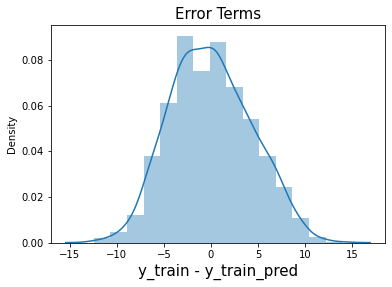

In [20]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

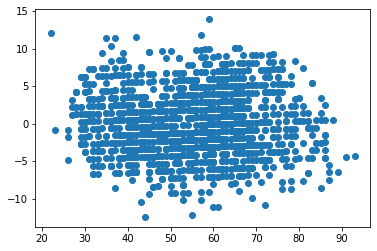

In [21]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [22]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

686     58.377169
1836    58.377169
1587    88.704726
63      78.921643
1348    71.095177
          ...    
146     76.965027
374     51.529011
1989    75.986718
581     53.485628
272     64.247019
Length: 640, dtype: float64

In [23]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9009451419275621

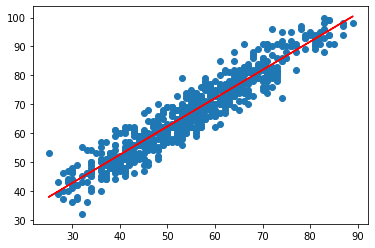

In [24]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [25]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [26]:

# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(1493, 1)
(640, 1)


In [27]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [28]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 13.374988195767308
Slope : [0.97830828]


In [29]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9054961340673476
0.900945141927562
